In [62]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sb

SchoolProfile_filename = '../../SchoolData/data_2012_school_profile.csv'
data = pd.read_csv(SchoolProfile_filename)

SchoolGrad_Absences_filename = '../../SchoolData/data_2012_School-Attendance-and-Graduation.csv'
SchoolGrad_Absences_data = pd.read_csv(SchoolGrad_Absences_filename)

In [63]:
dataFields = data.columns.values.tolist()
dataFields

['YEAR',
 'DISTRICT',
 'SCHOOL_ID',
 'DISTRICT_NAME',
 'SCHOOL_NAME',
 'GRADES_SERVED',
 'SAFE SCHOOL STATUS',
 'AVERAGE DAILY MEMBERSHIP',
 'TOTAL',
 'WHITE',
 'AFRICAN_AMERICAN',
 'HISPANIC',
 'ASIAN',
 'NATIVE AMERICAN',
 'MALE',
 'FEMALE',
 'WHITE_PCT',
 'AFRICAN AMERICAN (%)',
 'HISPANIC (%)',
 'ASIAN (%)',
 'NATIVE AMERICAN (%)',
 'MALE (%)',
 'FEMALE (%)',
 'WHITE MALE',
 'AFRICAN AMERICAN MALE',
 'HISPANIC MALE',
 'ASIAN MALE',
 'NATIVE AMERICAN MALE',
 'WHITE FEMALE',
 'AFRICAN AMERICAN FEMALE',
 'HISPANIC FEMALE',
 'ASIAN FEMALE',
 'NATIVE AMERICAN FEMALE',
 'ECONOMICALLY_DISADVANTAGED',
 'FREE ELIGIBLE',
 'REDUCED ELIGIBLE',
 'FREE REDUCED ELIGIBLE',
 'FREE (%)',
 'REDUCED (%)',
 'ECONOMICALLY_DISADVANTAGED_PCT']

In [64]:
dataFields = SchoolGrad_Absences_data.columns.values.tolist()
dataFields

['YEAR',
 'DISTRICT',
 'SCHOOL_ID',
 'DISTRICT_NAME',
 'SCHOOL_NAME',
 'K8 ATTENDANCE RATE(%)',
 'K8 PROMOTION RATE(%)',
 'STATE GOAL ATTENDANCE RATE',
 'STATE GOAL PROMOTION RATE',
 'ATTENDANCE RATE(%)',
 'COHORT DROPOUT (%)',
 'GRADUATION RATE (NCLB) (%)',
 'EVENT DROPOUT (%)',
 'ALL_GRAD_RATE',
 'WHITE GRAD RATE',
 'AFRICAN AMERICAN GRAD RATE',
 'HISPANIC GRAD RATE',
 'ASIAN GRAD RATE',
 'NATIVE AMERICAN GRAD RATE',
 'MALE GRAD RATE',
 'FEMALE GRAD RATE',
 'ECONOMICALLY DISADVANTAGED GRAD RATE',
 'STUDENTS WITH DISABILITIES GRAD RATE',
 'LIMITED ENGLISH PROFICIENT GRAD RATE']

In [65]:
JoinedData = data.merge(SchoolGrad_Absences_data, left_on=['SCHOOL_ID','DISTRICT'], right_on=['SCHOOL_ID','DISTRICT'])

JoinedData['ALL_GRAD_COUNT'] = JoinedData['ALL_GRAD_RATE']*JoinedData['TOTAL']/100

School_Profile_Groups = []

#JoinedData[['SCHOOL_NAME_x','SCHOOL_NAME_y']]


In [66]:
JoinedDataFields = JoinedData.columns.values.tolist()
#JoinedDataFields
#set(JoinedData.GRADES_SERVED)
#JoinedData.groupby(['GRADES_SERVED']).get_group('Grades 9-12').TOTAL.sum()
#JoinedData.query('GRADES_SERVED == "Grades 9-12"').TOTAL.sum()

In [87]:
def printSummary(query, label):
    student_count = 0
    white_student_count = 0
    black_student_count = 0
    hispanic_student_count = 0
    disabled_student_count = 0
    economically_disadvantaged_student_count = 0
    limited_english_proficiency_student_count = 0
    graduate_count = 0
    label_no_spaces = label.replace(' ', '_')
    
    gb = JoinedData.query(query)
    student_count = gb.TOTAL.sum()
    white_student_count = gb.WHITE.sum()
    black_student_count = gb.AFRICAN_AMERICAN.sum()
    hispanic_student_count = gb.HISPANIC.sum()
    economically_disadvantaged_student_count = gb.ECONOMICALLY_DISADVANTAGED.sum()
    graduate_count = gb.ALL_GRAD_COUNT.sum()
    graduation_pct = 0
    if student_count != 0:
        graduation_pct = (graduate_count/student_count)*100           
    School_Profile_Groups.append({'name': label_no_spaces, 
                                  'students': student_count, 
                                  'white_students': white_student_count, 
                                  'black_students': black_student_count, 
                                  'hispanic_students': hispanic_student_count, 
                                  'economically_disadvantaged_students': economically_disadvantaged_student_count, 
                                  'graduation_pct': graduation_pct})

    print(label)
    print('All Students: ' + str(int(student_count)))
    print('White Students: ' + str(int(white_student_count)))
    print('Black Students: ' + str(int(black_student_count)))
    print('Hispanic Students: ' + str(int(hispanic_student_count)))

    print('Economically Disadvantaged Students: ' + str(int(economically_disadvantaged_student_count)))
    print('Student Graduation percentage: ' + str(int(graduation_pct)))
    print('Query used:', query)

In [88]:
JoinedData.query('GRADES_SERVED == "Grades 9-12"')

,YEAR_x,DISTRICT,SCHOOL_ID,DISTRICT_NAME_x,SCHOOL_NAME_x,GRADES_SERVED,SAFE SCHOOL STATUS,AVERAGE DAILY MEMBERSHIP,TOTAL,WHITE,...,AFRICAN AMERICAN GRAD RATE,HISPANIC GRAD RATE,ASIAN GRAD RATE,NATIVE AMERICAN GRAD RATE,MALE GRAD RATE,FEMALE GRAD RATE,ECONOMICALLY DISADVANTAGED GRAD RATE,STUDENTS WITH DISABILITIES GRAD RATE,LIMITED ENGLISH PROFICIENT GRAD RATE,ALL_GRAD_COUNT
0,2012,10,2,Anderson County,Anderson County High School,Grades 9-12,Safe School,991,1017.0,1009.0,...,NaN,NaN,100.0,NaN,93.7,96.4,93.4,93.5,100.0,965.133
5,2012,10,25,Anderson County,Clinton High School,Grades 9-12,Safe School,"1,149",1157.0,1120.0,...,100.0,66.7,100.0,NaN,93.0,89.6,89.1,80.4,100.0,1056.341
21,2012,12,35,Oak Ridge,Oak Ridge High School,Grades 9-12,Safe School,"1,349",1378.0,1061.0,...,89.4,100.0,100.0,100.0,95.0,91.9,88.4,89.5,100.0,1288.430
26,2012,20,13,Bedford County,Cascade High School,Grades 9-12,Safe School,502,508.0,466.0,...,100.0,100.0,100.0,100.0,95.5,93.0,88.2,61.5,NaN,478.536
29,2012,20,20,Bedford County,Central High School,Grades 9-12,Safe School,"1,202",1215.0,805.0,...,97.1,90.7,100.0,50.0,87.2,92.9,87.4,74.3,77.8,1092.285
32,2012,20,35,Bedford County,Community High School,Grades 9-12,Safe School,463,474.0,442.0,...,100.0,88.9,NaN,100.0,87.3,94.6,85.7,78.6,66.7,429.444
41,2012,30,25,Benton County,Camden Central High School,Grades 9-12,Safe School,568,585.0,545.0,...,100.0,100.0,NaN,NaN,92.8,91.9,88.0,85.0,NaN,539.955
44,2012,40,5,Bledsoe County,Bledsoe County High School,Grades 9-12,Safe School,531,564.0,542.0,...,50.0,NaN,NaN,NaN,74.1,91.1,76.0,66.7,NaN,456.840
56,2012,50,63,Blount County,Heritage High School,Grades 9-12,Safe School,"1,426",1565.0,1503.0,...,71.4,77.8,100.0,NaN,85.8,97.0,87.2,76.2,100.0,1424.150
67,2012,50,155,Blount County,William Blount High School,Grades 9-12,Safe School,"1,521",1730.0,1666.0,...,100.0,100.0,100.0,100.0,87.3,93.0,81.9,77.4,NaN,1560.460


In [73]:
printSummary('GRADES_SERVED == "Grades 9-12"', 'All TN High Schools')

All TN High Schools
All Students: 247278
White Students: 173500
Black Students: 56169
Hispanic Students: 12803
Economically Disadvantaged Students: 127807
Student Graduation percentage: 9
Query used: GRADES_SERVED == "Grades 9-12"


In [75]:
def printHSSummary(query, label):
    printSummary(query + " and GRADES_SERVED == 'Grades 9-12'", label)
    
printHSSummary("DISTRICT_NAME_x in ('Davidson County', 'Shelby County', 'Knox County', 'Hamilton County')", 
             'TN Urban High Schools')

TN Urban High Schools
All Students: 57575
White Students: 31129
Black Students: 20220
Hispanic Students: 4322
Economically Disadvantaged Students: 27672
Student Graduation percentage: 6
Query used: DISTRICT_NAME_x in ('Davidson County', 'Shelby County', 'Knox County', 'Hamilton County') and GRADES_SERVED == 'Grades 9-12'


In [76]:
def printHSRangeSummary(fieldName, low, high, fieldLabel):
    if high == 100:
        high1 = 101
    else:
        high1 = high
    printHSSummary(str(low) + " <= " + fieldName + " and " + fieldName + " < " + str(high1), 
             'TN High Schools with ' + str(low) + '-' + str(high) + fieldLabel)

def printHSRacialSummary(low, high):
    printHSRangeSummary('WHITE_PCT', low, high, '% White Students')
    
printHSRacialSummary(0, 25)

TN High Schools with 0-25% White Students
All Students: 34117
White Students: 3061
Black Students: 27523
Hispanic Students: 3035
Economically Disadvantaged Students: 26629
Student Graduation percentage: 7
Query used: 0 <= WHITE_PCT and WHITE_PCT < 25 and GRADES_SERVED == 'Grades 9-12'


In [77]:
printHSRacialSummary(25, 50)

TN High Schools with 25-50% White Students
All Students: 25292
White Students: 10198
Black Students: 11482
Hispanic Students: 2468
Economically Disadvantaged Students: 14409
Student Graduation percentage: 7
Query used: 25 <= WHITE_PCT and WHITE_PCT < 50 and GRADES_SERVED == 'Grades 9-12'


In [78]:
printHSRacialSummary(50, 75)

TN High Schools with 50-75% White Students
All Students: 38022
White Students: 24964
Black Students: 9280
Hispanic Students: 2603
Economically Disadvantaged Students: 16175
Student Graduation percentage: 8
Query used: 50 <= WHITE_PCT and WHITE_PCT < 75 and GRADES_SERVED == 'Grades 9-12'


In [79]:
printHSRacialSummary(75, 100)

TN High Schools with 75-100% White Students
All Students: 149847
White Students: 135277
Black Students: 7884
Hispanic Students: 4697
Economically Disadvantaged Students: 64885
Student Graduation percentage: 10
Query used: 75 <= WHITE_PCT and WHITE_PCT < 101 and GRADES_SERVED == 'Grades 9-12'


In [80]:
def printHSEconSummary(low, high):
    printHSRangeSummary('ECONOMICALLY_DISADVANTAGED_PCT', low, high, '% Economically Disadvantaged Students')
    
printHSEconSummary(0, 25)

TN High Schools with 0-25% Economically Disadvantaged Students
All Students: 26411
White Students: 21792
Black Students: 2635
Hispanic Students: 945
Economically Disadvantaged Students: 3962
Student Graduation percentage: 5
Query used: 0 <= ECONOMICALLY_DISADVANTAGED_PCT and ECONOMICALLY_DISADVANTAGED_PCT < 25 and GRADES_SERVED == 'Grades 9-12'


In [81]:
printHSEconSummary(25, 50)

TN High Schools with 25-50% Economically Disadvantaged Students
All Students: 83350
White Students: 65061
Black Students: 12790
Hispanic Students: 3578
Economically Disadvantaged Students: 31134
Student Graduation percentage: 8
Query used: 25 <= ECONOMICALLY_DISADVANTAGED_PCT and ECONOMICALLY_DISADVANTAGED_PCT < 50 and GRADES_SERVED == 'Grades 9-12'


In [82]:
printHSEconSummary(50, 75)

TN High Schools with 50-75% Economically Disadvantaged Students
All Students: 107801
White Students: 81175
Black Students: 19097
Hispanic Students: 6008
Economically Disadvantaged Students: 62707
Student Graduation percentage: 10
Query used: 50 <= ECONOMICALLY_DISADVANTAGED_PCT and ECONOMICALLY_DISADVANTAGED_PCT < 75 and GRADES_SERVED == 'Grades 9-12'


In [83]:
printHSEconSummary(75, 100)

TN High Schools with 75-100% Economically Disadvantaged Students
All Students: 28916
White Students: 4985
Black Students: 21370
Hispanic Students: 2251
Economically Disadvantaged Students: 30004
Student Graduation percentage: 11
Query used: 75 <= ECONOMICALLY_DISADVANTAGED_PCT and ECONOMICALLY_DISADVANTAGED_PCT < 101 and GRADES_SERVED == 'Grades 9-12'


In [84]:
groupData = pd.DataFrame(School_Profile_Groups)
groupData = groupData[['name','students', 'white_students','black_students','hispanic_students', 'economically_disadvantaged_students',  
                       'graduation_pct']]
groupData

,name,students,white_students,black_students,hispanic_students,economically_disadvantaged_students,graduation_pct
0,All_TN_High_Schools,247278.0,173500.0,56169.0,12803.0,127807.0,9.569108
1,TN_Urban_High_Schools,57575.0,31129.0,20220.0,4322.0,27672.0,6.996613
2,TN_High_Schools_with_0-25%_White_Students,34117.0,3061.0,27523.0,3035.0,26629.0,7.634024
3,TN_High_Schools_with_25-50%_White_Students,25292.0,10198.0,11482.0,2468.0,14409.0,7.176973
4,TN_High_Schools_with_50-75%_White_Students,38022.0,24964.0,9280.0,2603.0,16175.0,8.256273
5,TN_High_Schools_with_75-100%_White_Students,149847.0,135277.0,7884.0,4697.0,64885.0,10.193130
6,TN_High_Schools_with_0-25%_Economically_Disadv...,26411.0,21792.0,2635.0,945.0,3962.0,5.713528
7,TN_High_Schools_with_25-50%_Economically_Disad...,83350.0,65061.0,12790.0,3578.0,31134.0,8.214757
8,TN_High_Schools_with_50-75%_Economically_Disad...,107801.0,81175.0,19097.0,6008.0,62707.0,10.453150
9,TN_High_Schools_with_75-100%_Economically_Disa...,28916.0,4985.0,21370.0,2251.0,30004.0,11.387121


In [85]:
def GradPctPie(row):
    labels = [groupData.name[row],'']
    sizes = [groupData.graduation_pct[row], 100 - groupData.graduation_pct[row]]
    colors = ['yellowgreen', 'gold']
    explode = (0, 0.1)  

    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=90)
    # Set aspect ratio to be equal so that pie is drawn as a circle.
    plt.axis('equal')
    print('Graduation Percentage:')
    plt.show()

Graduation Percentage:


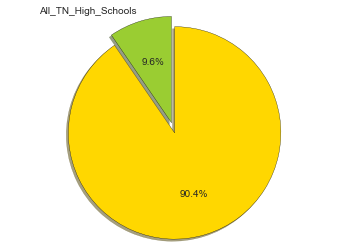

Graduation Percentage:


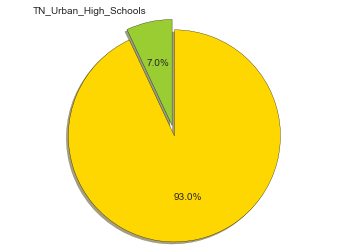

Graduation Percentage:


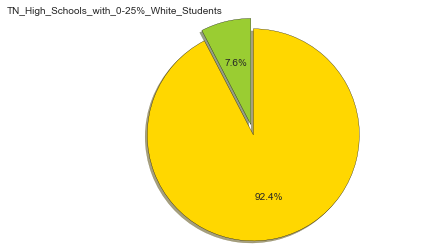

Graduation Percentage:


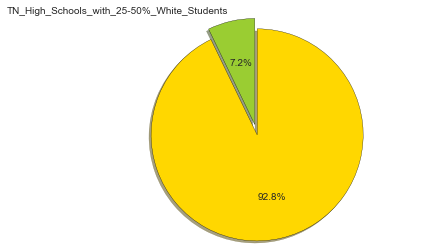

Graduation Percentage:


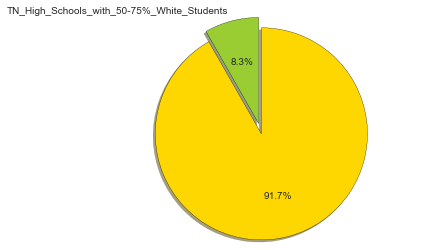

Graduation Percentage:


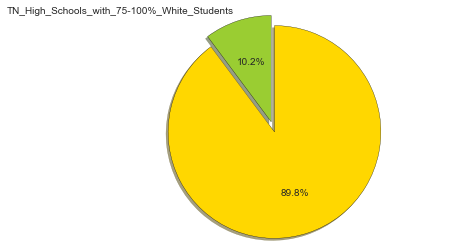

Graduation Percentage:


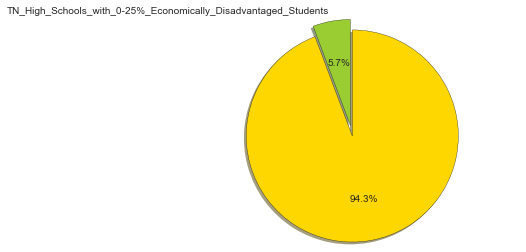

Graduation Percentage:


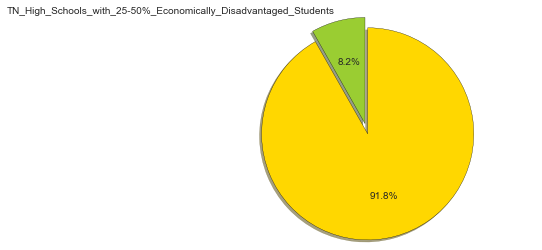

Graduation Percentage:


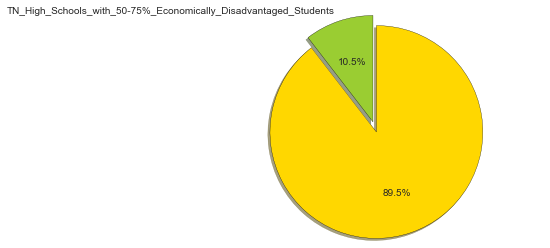

Graduation Percentage:


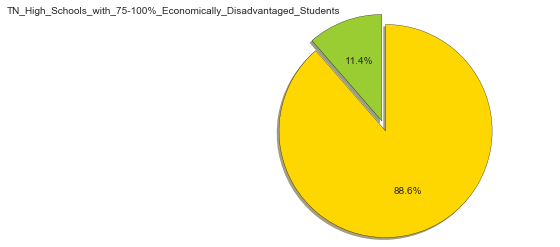

In [86]:
for i in range (0,10):
    GradPctPie(i)